In [1]:
pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: madhushikaattanayaka
Your Kaggle Key: ··········


100%|██████████| 20.3k/20.3k [00:00<00:00, 20.1MB/s]

In [4]:
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [5]:
data.loc[data['Sex']== 'Male','Sex']=1
data.loc[data['Sex']== 'Female' , 'Sex']=0

In [ ]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [6]:
x= data.drop(['Sex'], axis=1)
y=data['Sex']

In [13]:
#Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns = ['Height','Weight'])


In [15]:
x.head(5)


,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [17]:
y=y.astype('int')

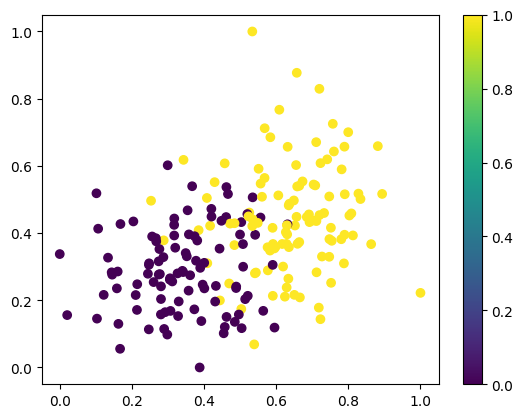

In [18]:
plt.scatter(x['Height'],x['Weight'],c=y)
plt.colorbar()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

In [ ]:
y_train.shape,y_test.shape

((164,), (41,))

In [ ]:
data.shape

(205, 3)

# **Model Building**

In [ ]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu' , input_shape=(2,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#compile the model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ['accuracy'])

#Train the model
epoch_number=10
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 6.9556 - accuracy: 0.5244
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 5.7849 - accuracy: 0.5244
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 4.7055 - accuracy: 0.5244
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 3.5341 - accuracy: 0.5244
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 2.4493 - accuracy: 0.5183
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 1.4604 - accuracy: 0.4878
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 1.1214 - accuracy: 0.4451
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 1.2429 - accuracy: 0.4207
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 1.2258 - accuracy: 0.4207
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 1.0924 - accuracy: 0.4451


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Evaluate**

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.0634 - accuracy: 0.5122


[1.0634031295776367, 0.5121951103210449]

In [ ]:
y_predictions=model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.99999917],
       [0.9999998 ],
       [0.9999999 ],
       [0.9999983 ],
       [1.        ]], dtype=float32)

In [ ]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [ ]:
#Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_predictions)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.4878049>

In [ ]:
#Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test,y_predictions)
recall.result()


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
history.history

{'loss': [6.955646991729736,
  5.784915924072266,
  4.705526351928711,
  3.534092903137207,
  2.4493160247802734,
  1.4603720903396606,
  1.121388554573059,
  1.2428650856018066,
  1.225804090499878,
  1.0924067497253418],
 'accuracy': [0.5243902206420898,
  0.5243902206420898,
  0.5243902206420898,
  0.5243902206420898,
  0.5182926654815674,
  0.4878048896789551,
  0.4451219439506531,
  0.42073169350624084,
  0.42073169350624084,
  0.4451219439506531]}

<Axes: >

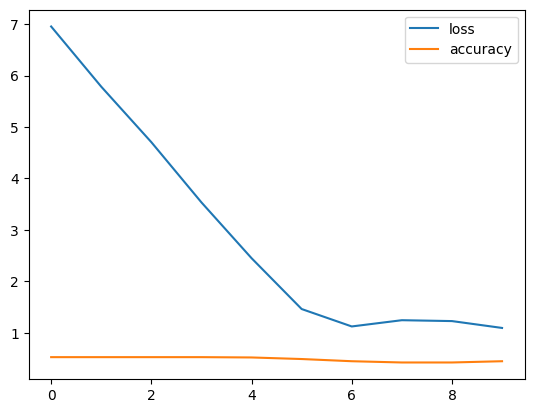

In [ ]:
pd.DataFrame(history.history).plot()

# **Next Approach**

# **Normalizing Data**

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns = ['Height','Weight'])


In [ ]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [20]:
#create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu' , input_shape=(2,)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#compile the model
model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.005),
              metrics = ['accuracy'])

#Train the model
epoch_number=20
history2 = model2.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 1s 6ms/step - loss: 0.6822 - accuracy: 0.5244
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.6769 - accuracy: 0.5244
Epoch 3/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.5244
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.5244
Epoch 5/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6643 - accuracy: 0.5244
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.5305
Epoch 7/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.5305
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.5427
Epoch 9/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6498 - accuracy: 0.5427
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.5549
Epoch 11/20
6/6 [======================

In [21]:
model2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.5744 - accuracy: 0.6585


[0.5743861794471741, 0.6585366129875183]

In [22]:
y_predictions2=model2.predict(x_test)
y_predictions2[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.5069399 ],
       [0.71289283],
       [0.73419285],
       [0.56286937],
       [0.67959535]], dtype=float32)

In [23]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [24]:
#Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_predictions2)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5882353>

In [25]:
history2.history

{'loss': [0.6822025775909424,
  0.6769190430641174,
  0.6720391511917114,
  0.6676092147827148,
  0.6642633676528931,
  0.6606487035751343,
  0.6570199728012085,
  0.6534274816513062,
  0.6498043537139893,
  0.6451810598373413,
  0.6373080611228943,
  0.6303764581680298,
  0.6220991611480713,
  0.6137451529502869,
  0.60469651222229,
  0.5946471691131592,
  0.5859139561653137,
  0.5753535032272339,
  0.5657340288162231,
  0.5546711683273315],
 'accuracy': [0.5243902206420898,
  0.5243902206420898,
  0.5243902206420898,
  0.5243902206420898,
  0.5243902206420898,
  0.5304877758026123,
  0.5304877758026123,
  0.542682945728302,
  0.542682945728302,
  0.5548780560493469,
  0.5670731663703918,
  0.5914633870124817,
  0.5975610017776489,
  0.6219512224197388,
  0.6219512224197388,
  0.6768292784690857,
  0.6829268336296082,
  0.707317054271698,
  0.7439024448394775,
  0.7378048896789551]}

<Axes: >

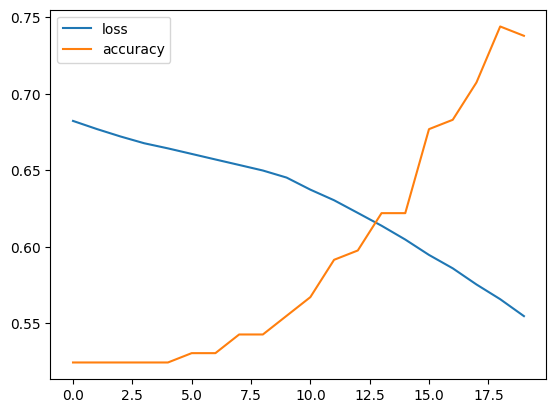

In [26]:
pd.DataFrame(history2.history).plot()